In [51]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np

In [13]:
#Cuadrados medios
def funCuadradosMedios(xo,d,iteraciones):
    final = []
    xn = xo
    # print("It. \t Xn \t Ui \t Rn")
    for i in range(iteraciones):
        xnn = xn**2
        txnn = str(xnn).zfill(8)
        tam = len(txnn)
        ui = int(txnn[int(tam/2-d/2):int(tam/2+d/2)])
        rn = ui / (int('9'*d)+1)
    #   print(str(i) + "\t" + str(xn) + "\t"+ str(ui)+"\t"+str(rn))
        final.append(rn)
        xn = ui

    return final

In [27]:
#Congruencia lineal
def funCongruenciaLineal(xo,a,b,m,iteraciones):
    final = []
    xn = xo
    # print("It. \t Xn \t Ui")
    for i in range(iteraciones):
        xnn = (a*xn+b) % m
        ui = xnn/m
        # print(str(i) + "\t"+ str(xnn)+"\t"+str(ui))
        final.append(ui)
        xn = xnn
    return final

In [31]:
#tausworthe
def binario_a_decimal(numero_binario):
	numero_decimal = 0 

	for posicion, digito_string in enumerate(numero_binario[::-1]):
		numero_decimal += int(digito_string) * 2 ** posicion

	return numero_decimal
def funTausworthe(r,q,l):
    bits =[]

    #ingresar los valores [0,1] personalmente para el vector inicial
    # for x in range(0,q):
    #     bit = input('Ingrese un valor binario para el vector inicial de longitud '+str(q))
    #     bits.append(int(bit))

    #ooo, llenar directamente el vector inicial con 1
    for x in range(0,q):
        bits.append(1)

    cantidad = (2**q) - 1 - q

    for i in range(q+1,cantidad+1):
        if bits[(i-r)-1] == bits[(i-q)-1]:
            bits.append(0)
        else:
            bits.append(1)

    vector = ''
    for x in range(0,len(bits)):
        vector = vector + str(bits[x])
        if (x+1) % q == 0:
            vector += ' '

    # print(vector)
    nGrupos = math.floor(len(bits)/l)
    # print('Se obtienen ',nGrupos, ' numeros decimales conformados de ', l, ' bits')
    # print('Sobran ', len(bits)-(l*nGrupos), ' bits no utilizados')

    grupos=[bits[i:i + l] for i in range(0, len(bits), l)]

    decimales = []

    for x in grupos:
        binario = ''
        for b in x:
            binario += str(b)
        decimales.append(binario_a_decimal(binario))

    dividido = ''
    divisor = 2**l
    final = []
    for x in decimales:
        dividido += str(x) + '/' + str(divisor) + ",  "
        final.append(x/divisor)

    # print(dividido)
    # print('Final: ',final)
    return final



In [63]:
#Random python
def funRandomPython(seed,iteraciones):
    final = []
    random.seed(seed)
    [final.append(random.random())for i in range(iteraciones)]
    return final


In [68]:
# cuadradosMedios = funCuadradosMedios(74731897457,7,15) #si funciona
# congruenciaLineal = funCongruenciaLineal(7,74731897457,37747318974,19,15) #si funciona
# tausworthe = funTausworthe(3,7,5) # si funciona
# randomPython = funRandomPython(11052022,100) # si funciona

In [66]:
#Defino una funcion para realizar un conteo de los numeros que caen dentro de cada intervalo
def calcular_chi(numeros):
  tablas = {}
  for i in np.arange(0.1, 1.1, 0.1): # aqui separo en intervalos de 0.1
    for j in numeros:
      if j > i-0.1 and j <= i: # Compruebo si el valor esta dentro del intervalor
        tablas[round(i-0.1,1)] = tablas[round(i-0.1,1)]+1 if round(i-0.1,1) in tablas else 1
  return tablas

#defino una funcion para aplicar la formula y obtener la desviacion estandar de cada intervalo  
def sumatoria_chi(tabla, E):
  return sum([(valor-E)**2/E for valor in tabla.values()])

def graficar(tabla):
  plt.bar(range(len(tabla)), list(tabla.values()), tick_label=list(tabla.keys()))
  plt.show()


Cadrados medios
Tabla de intervalos y el conteo de numeros dentro de cada intervalo
{0.0: 6, 0.1: 9, 0.2: 10, 0.3: 10, 0.4: 6, 0.5: 12, 0.6: 13, 0.7: 11, 0.8: 7, 0.9: 16}
Valor de chi cuadrado
9.200000000000001
Grafica de barras


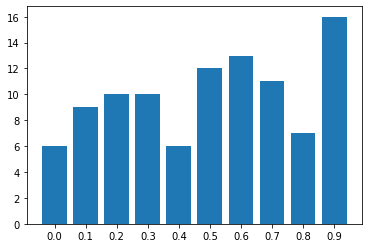

In [72]:
  
# print("Los 100 numeros aleatorios generados")
# print(randomPython)
print('Cadrados medios')
print("Tabla de intervalos y el conteo de numeros dentro de cada intervalo")
tablas = calcular_chi(funCuadradosMedios(74731897457,7,100))
print(tablas)
print("Valor de chi cuadrado")
print(sumatoria_chi(tablas, 10))
print("Grafica de barras")
graficar(tablas)  


Congruencia lineal
Tabla de intervalos y el conteo de numeros dentro de cada intervalo
{0.1: 11, 0.3: 22, 0.6: 11, 0.7: 11, 0.8: 23, 0.9: 11}
Valor de chi cuadrado
31.7
Grafica de barras


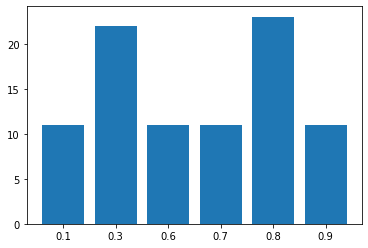

In [74]:
print('Congruencia lineal')
print("Tabla de intervalos y el conteo de numeros dentro de cada intervalo")
tablas = calcular_chi(funCongruenciaLineal(7,74731897457,37747318974,19,100))
print(tablas)
print("Valor de chi cuadrado")
print(sumatoria_chi(tablas, 10))
print("Grafica de barras")
graficar(tablas)  


Tausworthe
Tabla de intervalos y el conteo de numeros dentro de cada intervalo
{0.0: 2, 0.1: 3, 0.2: 5, 0.3: 2, 0.4: 2, 0.5: 1, 0.6: 2, 0.7: 2, 0.8: 1, 0.9: 4}
Valor de chi cuadrado
59.2
Grafica de barras


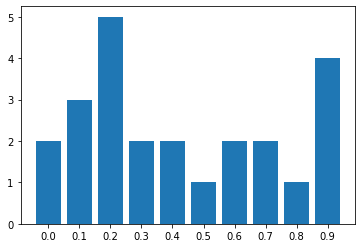

In [75]:
print('Tausworthe')
print("Tabla de intervalos y el conteo de numeros dentro de cada intervalo")
tablas = calcular_chi(funTausworthe(3,7,5))
print(tablas)
print("Valor de chi cuadrado")
print(sumatoria_chi(tablas, 10))
print("Grafica de barras")
graficar(tablas)  



Random de python
Tabla de intervalos y el conteo de numeros dentro de cada intervalo
{0.0: 15, 0.1: 11, 0.2: 14, 0.3: 10, 0.4: 2, 0.5: 17, 0.6: 8, 0.7: 9, 0.8: 7, 0.9: 7}
Valor de chi cuadrado
17.8
Grafica de barras


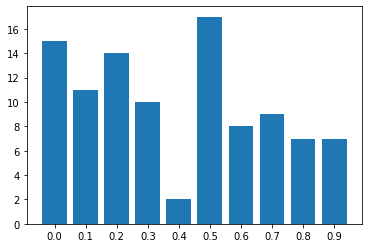

In [76]:
print('Random de python')
print("Tabla de intervalos y el conteo de numeros dentro de cada intervalo")
tablas = calcular_chi(funRandomPython(11052022,100))
print(tablas)
print("Valor de chi cuadrado")
print(sumatoria_chi(tablas, 10))
print("Grafica de barras")
graficar(tablas)  
